<center><h2> Εθνικό Μετσόβιο Πολυτεχνείο  <br>
Σχολή Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών <br>
Δ.Π.Μ.Σ. Επιστήμη Δεδομένων και Μηχανική Μάθηση  
  </h2></center>


---


<center><h2>
Εξόρυξη Γνώσης από Δεδομένα <br>
Εξαμηνιαία Εργασία <br><br>
    
Γιώργος Βερνίκος ΑΜ: 03400005  <br> 
Νικηφόρος Μανδηλαράς  ΑΜ: 03400022 <br>
Χρήστος Σπυρόπουλος ΑΜ: 03400035    <br>
</h2></center>

Αρχικά εισάγουμε όλες τις απαιραίτητες εξαρτήσεις.

In [2]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14,14)})
print(os.listdir("../input"))

['game_results.csv', 'data_euroleague.csv']


Διαβάσουμε το σύνολο των δεδομένων μας από τα csv αρχεία. Το πρώτο περιείχε αποτελέσματα αγώνων ενώ το δεύτερο στοιχεία για κάθε φάση όλων των παιχνιδιών.

In [3]:
euroleague = pd.read_csv('../input/game_results.csv', engine='python')
stats = pd.read_csv('../input/data_euroleague.csv', engine='python')

Κρατάμε τα δεδομένα που αφορούν την αγωνιστική περίοδο 2016-2017 και αναπαριστούμε τις νίκες που έκανε η κάθε ομάδα παίζοντας ως γηπεδούχος.

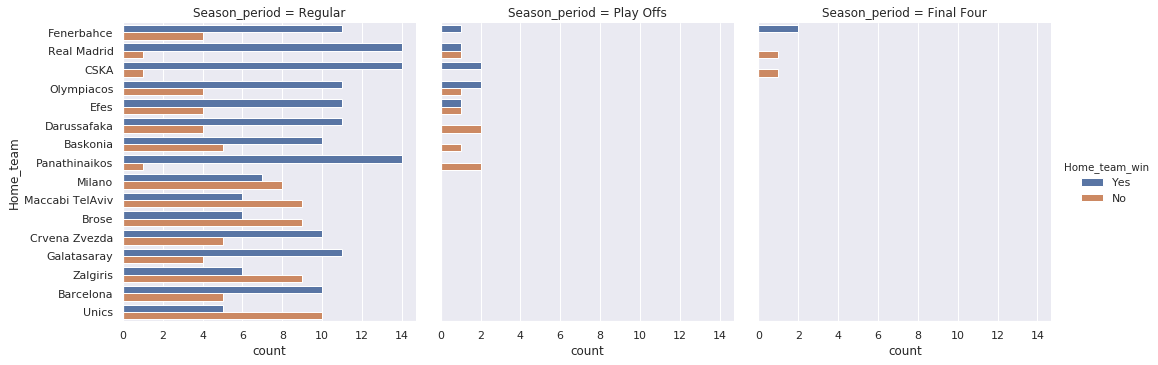

In [4]:
euroleague1 = euroleague[:259]

ax = sns.catplot(y='Home_team', hue='Home_team_win', col='Season_period' ,data=euroleague1, kind='count',
                col_order=['Regular', 'Play Offs', 'Final Four'])

Αντίστοιχα και για την αγωνιστική περίοδο 2017-2018.

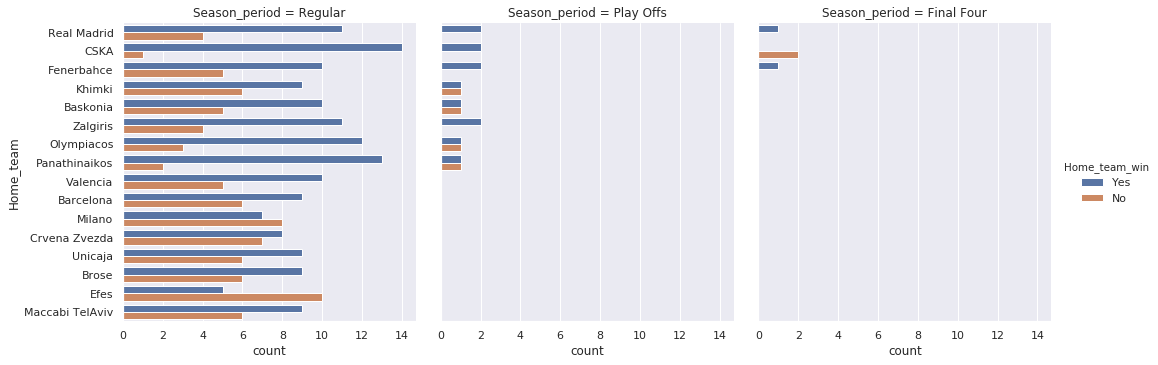

In [5]:
euroleague2 = euroleague[259:]

ax = sns.catplot(y='Home_team', hue='Home_team_win', col='Season_period' ,data=euroleague2, kind='count',
                col_order=['Regular', 'Play Offs', 'Final Four'], hue_order=['Yes', 'No'])

Παρακάτω αφαιρούμε από τις φάσεις τις εγγραφές όπου απουσιάζει η εγγραφή του παίκτη που εκδηλώνει την επίθεση. Παρατηρήσαμε πως όποτε συμβαίνει κάτι τέτοιο απουσιάζουν και πολλές άλλες στήλες οπότε δε μπορούμε να βασιστούμε σε αυτές τις εγγραφές για εξαγωγές συμπερασμάτων.

In [6]:
filtered_data = stats[stats['oplayer.name'].notnull()]

Πραγματοποιούμε και το διαχωρισμό των σεζόν και για τις φάσεις των αγώνων.

In [8]:
stats16_17 = filtered_data[filtered_data['Season']=='2016 - 2017']
stats17_18 = filtered_data[filtered_data['Season']=='2017 - 2018']

Και για τις δύο σεζόν κρατάμε χωριστά τις φάσεις ανάλογα με το σε ποια περίοδο αγώνων ανήκουν. 'Κανονική', 'Play Offs' ή 'Final Four', Θα χρησιμοποιήσουμε αγώνες από τις διάφορες φάσεις με διαφορετικό τρόπο στη συνέχεια της μελέτης μας.  

In [9]:
regular16_17 = stats16_17[stats16_17['Season_period']=='Regular']
play_offs16_17 = stats16_17[stats16_17['Season_period']=='Play Offs']
ff16_17 = stats16_17[stats16_17['Season_period']=='Final Four']

In [10]:
regular17_18 = stats17_18[stats17_18['Season_period']=='Regular']
play_offs17_18 = stats17_18[stats17_18['Season_period']=='Play Offs']
ff17_18 = stats17_18[stats17_18['Season_period']=='Final Four']

Ακολουθεί η ίδια διαδικασία για και τις δύο σεζόν.

In [11]:
regular = filtered_data[filtered_data['Season_period']=='Regular']
play_offs = filtered_data[filtered_data['Season_period']=='Play Offs']
ff = filtered_data[filtered_data['Season_period']=='Final Four']

Στη συνέχεια ομαδοποιούμε της φάσης ανά ομάδα και βρίσκουμε:
* συνολικά δίποντα που έχουν επιχειρήσει
* συνολικά δίποντα που έχουν πετύχει
* συνολικά τρίποντα που έχουν επιχειρήσει
* συνολικά τρίποντα που έχουν πετύχει
* βολές που έχουν εκτελέσει
* βολές που πέτυχαν

In [12]:
regular16_17.drop_duplicates('oplayer.name').groupby('team').agg({'2 Pts Tentative_16': 'sum',
                                                                  '2 Pts Converted_16': 'sum',
                                                                  '3 Pts Tentative_16': 'sum',
                                                                  '3 Pts Converted_16': 'sum',
                                                                  'FreeThrow_16': 'sum',
                                                                  'Free_Throw_Converted_16': 'sum'})

,2 Pts Tentative_16,2 Pts Converted_16,3 Pts Tentative_16,3 Pts Converted_16,FreeThrow_16,Free_Throw_Converted_16
team,,,,,,
Barcelona,1020,563.0,713,275.0,456.0,338.0
Baskonia,1340,839.0,760,269.0,596.0,456.0
Brose,1086,692.0,694,282.0,451.0,352.0
CSKA,1347,885.0,754,306.0,801.0,658.0
Crvena Zvezda,1259,719.0,608,204.0,516.0,386.0
Darussafaka,1319,765.0,819,311.0,664.0,488.0
Efes,1566,904.0,779,268.0,684.0,502.0
Fenerbahce,1247,749.0,771,312.0,604.0,460.0
Galatasaray,1139,650.0,678,274.0,405.0,294.0


Δημιουργία των αντίστοιχων μεταβλητών για τις δύο σεζόν ξεχωριστά αλλά και συνολικά.

In [30]:
pts2_att = regular.drop_duplicates('oplayer.name').groupby('team').agg({'2 Pts Tentative_16': 'sum'})
pts2_made = regular.drop_duplicates('oplayer.name').groupby('team').agg({'2 Pts Converted_16': 'sum'})
pts3_att = regular.drop_duplicates('oplayer.name').groupby('team').agg({'3 Pts Tentative_16': 'sum'})
pts3_made = regular.drop_duplicates('oplayer.name').groupby('team').agg({'3 Pts Converted_16': 'sum'})
ft_att = regular.drop_duplicates('oplayer.name').groupby('team').agg({'FreeThrow_16': 'sum'})
ft_made = regular.drop_duplicates('oplayer.name').groupby('team').agg({'Free_Throw_Converted_16': 'sum'})

In [31]:
pts2_att16_17 = regular16_17.drop_duplicates('oplayer.name').groupby('team').agg({'2 Pts Tentative_16': 'sum'})
pts2_made16_17 = regular16_17.drop_duplicates('oplayer.name').groupby('team').agg({'2 Pts Converted_16': 'sum'})
pts3_att16_17 = regular16_17.drop_duplicates('oplayer.name').groupby('team').agg({'3 Pts Tentative_16': 'sum'})
pts3_made16_17 = regular16_17.drop_duplicates('oplayer.name').groupby('team').agg({'3 Pts Converted_16': 'sum'})
ft_att16_17 = regular16_17.drop_duplicates('oplayer.name').groupby('team').agg({'FreeThrow_16': 'sum'})
ft_made16_17 = regular16_17.drop_duplicates('oplayer.name').groupby('team').agg({'Free_Throw_Converted_16': 'sum'})

In [32]:
pts2_att17_18 = regular17_18.drop_duplicates('oplayer.name').groupby('team').agg({'2 Pts Tentative_16': 'sum'})
pts2_made17_18 = regular17_18.drop_duplicates('oplayer.name').groupby('team').agg({'2 Pts Converted_16': 'sum'})
pts3_att17_18 = regular17_18.drop_duplicates('oplayer.name').groupby('team').agg({'3 Pts Tentative_16': 'sum'})
pts3_made17_18 = regular17_18.drop_duplicates('oplayer.name').groupby('team').agg({'3 Pts Converted_16': 'sum'})
ft_att17_18 = regular17_18.drop_duplicates('oplayer.name').groupby('team').agg({'FreeThrow_16': 'sum'})
ft_made17_18 = regular17_18.drop_duplicates('oplayer.name').groupby('team').agg({'Free_Throw_Converted_16': 'sum'})

## Δημιουργία Μεταβλητών

Στη συνέχεια προχωράμε στη δημιουργία των διαφόρων μεταβλητών που θα χρησιμοποιήσουμε για την εκπαίδευση των μοντέλων μας. 

Ξεκινάμε με τις ασίστ ανά ομάδα.

In [13]:
regular16_17.groupby('team')['assist.name'].count()

team
Barcelona          506
Baskonia           519
Brose              536
CSKA               582
Crvena Zvezda      478
Darussafaka        417
Efes               540
Fenerbahce         494
Galatasaray        566
Maccabi TelAviv    506
Milano             500
Olympiacos         437
Panathinaikos      448
Real Madrid        611
Unics              459
Zalgiris           542
Name: assist.name, dtype: int64

Δημιουργία αντίστοιχων μεταβλητών.

In [15]:
assists = regular.groupby('team')['assist.name'].count()
assists16_17 = regular16_17.groupby('team')['assist.name'].count()
assists17_18 = regular17_18.groupby('team')['assist.name'].count()

Εξαγωγή των λαθών που διέπραξε κάθε ομάδα.

In [16]:
regular16_17[regular16_17['name']=='Turnover'].groupby('team').size()

team
Barcelona          419
Baskonia           377
Brose              362
CSKA               408
Crvena Zvezda      347
Darussafaka        321
Efes               337
Fenerbahce         358
Galatasaray        343
Maccabi TelAviv    408
Milano             413
Olympiacos         359
Panathinaikos      323
Real Madrid        344
Unics              366
Zalgiris           392
dtype: int64

In [34]:
turnovers = regular[regular['name']=='Turnover'].groupby('team').size()
turnovers16_17 = regular16_17[regular16_17['name']=='Turnover'].groupby('team').size()
turnovers17_18 = regular17_18[regular17_18['name']=='Turnover'].groupby('team').size()

In [17]:
regular16_17[regular16_17['name'].str.contains('Violation')].groupby('team').size()

team
Barcelona          107
Baskonia           109
Brose               94
CSKA               125
Crvena Zvezda      112
Darussafaka         86
Efes               114
Fenerbahce          98
Galatasaray         89
Maccabi TelAviv    111
Milano             101
Olympiacos         128
Panathinaikos       84
Real Madrid        101
Unics              105
Zalgiris           115
dtype: int64

Αντίστοιχα και για τα fouls.

In [18]:
regular16_17[regular16_17['name'].str.contains('Foul')].groupby('team').size()

team
Barcelona          486
Baskonia           450
Brose              451
CSKA               536
Crvena Zvezda      444
Darussafaka        474
Efes               461
Fenerbahce         491
Galatasaray        427
Maccabi TelAviv    431
Milano             483
Olympiacos         521
Panathinaikos      467
Real Madrid        481
Unics              498
Zalgiris           500
dtype: int64

In [19]:
fouls = regular[regular['name'].str.contains('Foul')].groupby('team').size()
fouls16_17 = regular16_17[regular16_17['name'].str.contains('Foul')].groupby('team').size()
fouls17_18 = regular17_18[regular17_18['name'].str.contains('Foul')].groupby('team').size()

Σε αυτό το σημείο εξάγουμε από την περιγραφή των ενεργειών το πλήθος των επιθέσεων 'pick & roll' (που αποτελούν μία κλασσική επιθετική τακτική στο μπάσκετ) ανά ομάδα.

In [20]:
regular16_17[regular16_17['play_event_description'].str.contains('P&R')].groupby('team').size()

team
Barcelona           773
Baskonia            841
Brose               969
CSKA                953
Crvena Zvezda       917
Darussafaka         958
Efes                940
Fenerbahce          855
Galatasaray         969
Maccabi TelAviv     938
Milano              832
Olympiacos          879
Panathinaikos       869
Real Madrid         769
Unics              1007
Zalgiris            926
dtype: int64

In [21]:
pnr = regular[regular['play_event_description'].str.contains('P&R')].groupby('team').size()
pnr16_17 = regular16_17[regular16_17['play_event_description'].str.contains('P&R')].groupby('team').size()
pnr17_18 = regular17_18[regular17_18['play_event_description'].str.contains('P&R')].groupby('team').size()

Αντίστοιχη διαδικασία και για τα rebounds.

In [22]:
regular16_17[regular16_17['play_event_description'].str.contains('Rebound')].groupby('team').size()

team
Barcelona          246
Baskonia           280
Brose              184
CSKA               235
Crvena Zvezda      232
Darussafaka        299
Efes               323
Fenerbahce         222
Galatasaray        233
Maccabi TelAviv    210
Milano             277
Olympiacos         293
Panathinaikos      248
Real Madrid        296
Unics              280
Zalgiris           277
dtype: int64

In [23]:
rebounds = regular[regular['play_event_description'].str.contains('Rebound')].groupby('team').size()
rebounds16_17 = regular16_17[regular16_17['play_event_description'].str.contains('Rebound')].groupby('team').size()
rebounds17_18 = regular17_18[regular17_18['play_event_description'].str.contains('Rebound')].groupby('team').size()

Υπολογίζουμε με τον ίδιο τρόπο και τις καταστάσεις ένας προς έναν (isolations).

In [24]:
regular16_17[regular16_17['play_event_description'].str.contains('ISO')].groupby('team').size()

team
Barcelona          231
Baskonia           282
Brose              207
CSKA               196
Crvena Zvezda      261
Darussafaka        326
Efes               300
Fenerbahce         174
Galatasaray        190
Maccabi TelAviv    280
Milano             202
Olympiacos         231
Panathinaikos      263
Real Madrid        165
Unics              428
Zalgiris            96
dtype: int64

In [26]:
isos = regular[regular['play_event_description'].str.contains('ISO')].groupby('team').size()

Ακόμα εξάγουμε τους αιφνιδιασμούς που επιχείρησε κάθε ομάδα καθώς και πόσους μετέτρεψε σε σκορ.

In [27]:
trans_att16_17 = regular16_17[regular16_17['play_event_description'].str.contains('Transition')].groupby(["team"]).size()
trans_att17_18 = regular17_18[regular17_18['play_event_description'].str.contains('Transition')].groupby(["team"]).size()
trans_att = regular[regular['play_event_description'].str.contains('Transition')].groupby(["team"]).size()

In [28]:
trans_made16_17 = regular16_17[(regular16_17['play_event_description'].str.contains('Transition')) & (regular16_17["isbasket"]=="Yes")].groupby(["team"]).size()
trans_made17_18 = regular17_18[(regular17_18['play_event_description'].str.contains('Transition')) & (regular17_18["isbasket"]=="Yes")].groupby(["team"]).size()
trans_made = regular[(regular['play_event_description'].str.contains('Transition')) & (regular["isbasket"]=="Yes")].groupby(["team"]).size()

Συνενώνουμε τις παραπάνω μεταβλητές.

In [35]:
team_feat16_17 = pd.concat([pts2_att16_17, pts2_made16_17, pts3_att16_17, pts3_made16_17, ft_att16_17, ft_made16_17,
                      assists16_17, turnovers16_17, fouls16_17, rebounds16_17, pnr16_17], axis=1, ignore_index=True) / 30
team_feat17_18 = pd.concat([pts2_att17_18, pts2_made17_18, pts3_att17_18, pts3_made17_18, ft_att17_18, ft_made17_18,
                      assists17_18, turnovers17_18, fouls17_18, rebounds17_18, pnr17_18,], axis=1, ignore_index=True) / 30
team_feat = pd.concat([pts2_att, pts2_made, pts3_att, pts3_made, ft_att, ft_made,
                      assists, turnovers, fouls, rebounds, pnr], axis=1, ignore_index=True) / 60

In [36]:
team_feat16_17.columns = ['pts2_att', 'pts2_made', 'pts3_att', 'pts3_made', 'ft_att', 'ft_made',
                          'assists', 'turnovers', 'fouls', 'rebounds', 'pnrs']
team_feat17_18.columns = ['pts2_att', 'pts2_made', 'pts3_att', 'pts3_made', 'ft_att', 'ft_made',
                          'assists', 'turnovers', 'fouls', 'rebounds', 'pnrs']
team_feat.columns = ['pts2_att', 'pts2_made', 'pts3_att', 'pts3_made', 'ft_att', 'ft_made',
                          'assists', 'turnovers', 'fouls', 'rebounds', 'pnrs',]

Αναπαριστούμε τα διανύσματα χαρακτηριστικών όπως έχουν διαμορφωθεί για την κάθε ομάδα.

In [38]:
team_feat16_17

,pts2_att,pts2_made,pts3_att,pts3_made,ft_att,ft_made,assists,turnovers,fouls,rebounds,pnrs
team,,,,,,,,,,,
Barcelona,34.000000,18.766667,23.766667,9.166667,15.200000,11.266667,16.866667,13.966667,16.200000,8.200000,25.766667
Baskonia,44.666667,27.966667,25.333333,8.966667,19.866667,15.200000,17.300000,12.566667,15.000000,9.333333,28.033333
Brose,36.200000,23.066667,23.133333,9.400000,15.033333,11.733333,17.866667,12.066667,15.033333,6.133333,32.300000
CSKA,44.900000,29.500000,25.133333,10.200000,26.700000,21.933333,19.400000,13.600000,17.866667,7.833333,31.766667
Crvena Zvezda,41.966667,23.966667,20.266667,6.800000,17.200000,12.866667,15.933333,11.566667,14.800000,7.733333,30.566667
Darussafaka,43.966667,25.500000,27.300000,10.366667,22.133333,16.266667,13.900000,10.700000,15.800000,9.966667,31.933333
Efes,52.200000,30.133333,25.966667,8.933333,22.800000,16.733333,18.000000,11.233333,15.366667,10.766667,31.333333
Fenerbahce,41.566667,24.966667,25.700000,10.400000,20.133333,15.333333,16.466667,11.933333,16.366667,7.400000,28.500000
Galatasaray,37.966667,21.666667,22.600000,9.133333,13.500000,9.800000,18.866667,11.433333,14.233333,7.766667,32.300000


Χωρίζουμε train και test σετ με βάση την περίοδο διεξαγωγής των αγώνων.

In [39]:
trainset16_17 = euroleague1[(euroleague1['Season_period']=='Regular') & (euroleague1['Home_points']> 25)]
trainset17_18 = euroleague2[(euroleague2['Season_period']=='Regular') & (euroleague2['Home_points']> 25)]
trainset = euroleague[(euroleague['Season_period']=='Regular') & (euroleague['Home_points']> 25)]
testset16_17 = euroleague1[(euroleague1['Season_period']=='Play Offs') & (euroleague1['Home_points']> 25)]
testset17_18 = euroleague2[(euroleague2['Season_period']=='Play Offs') & (euroleague2['Home_points']> 25)]
testset = euroleague[(euroleague['Season_period']=='Play Offs') & (euroleague['Home_points']> 25)]

In [40]:
testset

,Home_team,Away_team,Home_points,Away_points,Season_period,winner,Count,Home_team_win
4,Olympiacos,Efes,87,78,Play Offs,Olympiacos,1,Yes
5,Efes,Olympiacos,62,74,Play Offs,Olympiacos,1,No
6,Darussafaka,Real Madrid,78,89,Play Offs,Real Madrid,1,No
7,Darussafaka,Real Madrid,81,88,Play Offs,Real Madrid,1,No
8,Efes,Olympiacos,64,60,Play Offs,Efes,1,Yes
9,Baskonia,CSKA,88,90,Play Offs,CSKA,1,No
10,Fenerbahce,Panathinaikos,79,61,Play Offs,Fenerbahce,1,Yes
11,Real Madrid,Darussafaka,80,84,Play Offs,Darussafaka,1,No
12,Olympiacos,Efes,71,73,Play Offs,Efes,1,No
13,Panathinaikos,Fenerbahce,75,80,Play Offs,Fenerbahce,1,No


In [41]:
def team2feat(team):
    return team_feat.loc[team]
def team2feat16(team):
    return team_feat16_17.loc[team]
def team2feat17(team):
    return team_feat17_18.loc[team]

Αφαιρούμε τα διανύσματα καθώς οι διαφορές θα αποτελέσουν είσοδο στο μοντέλο μας.

In [42]:
x_train16_17 = trainset16_17['Home_team'].apply(team2feat16) - trainset16_17['Away_team'].apply(team2feat16)
y_train16_17 = trainset16_17['Home_team_win']
x_test16_17 = testset16_17['Home_team'].apply(team2feat16) - testset16_17['Away_team'].apply(team2feat16)
y_test16_17 = testset16_17['Home_team_win']

In [43]:
x_train17_18 = trainset17_18['Home_team'].apply(team2feat17) - trainset17_18['Away_team'].apply(team2feat17)
y_train17_18 = trainset17_18['Home_team_win']
x_test17_18 = testset17_18['Home_team'].apply(team2feat17) - testset17_18['Away_team'].apply(team2feat17)
y_test17_18 = testset17_18['Home_team_win']

In [44]:
# x_train = trainset['Home_team'].apply(team2feat) - trainset['Away_team'].apply(team2feat)
x_train = pd.concat([x_train16_17, x_train17_18])
y_train = trainset['Home_team_win']
# x_test = testset['Home_team'].apply(team2feat) - testset['Away_team'].apply(team2feat)
x_test = pd.concat([x_test16_17, x_test17_18])
y_test = testset['Home_team_win']
# y_test1 = testset1['Home_team_win'].replace({'Yes': 1, 'No': 0})

Το σύνολο των μεθόδων που θα χρησιμοποιήσουμε για την εκπαίδευση.

In [45]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN3', KNeighborsClassifier(n_neighbors=3)))
models.append(('KNN5', KNeighborsClassifier(n_neighbors=5)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('SVM', SVC(kernel='poly')))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))

Κανονικοποίηση των δεδομένων με μέση τιμή το μηδέν και τυπική απόκλιση 1.

In [46]:
scaler16_17 = StandardScaler()
scaler16_17.fit(x_train16_17)
train_set_scaled16_17 = scaler16_17.transform(x_train16_17)
test_set_scaled16_17 = scaler16_17.transform(x_test16_17)

Εκπαίδευση και προβλέψεις των διαφόρων μοντέλων.

In [47]:
for name, model in models:
    model.fit(train_set_scaled16_17, y_train16_17)
    predictions16_17 = model.predict(test_set_scaled16_17)  
    acc = np.sum(y_test16_17 == predictions16_17) / len(y_test16_17)
    print("Accuracy for predictions based on {} is : {:.2f}%".format(name,acc*100))

Accuracy for predictions based on LR is : 60.00%
Accuracy for predictions based on KNN3 is : 53.33%
Accuracy for predictions based on KNN5 is : 40.00%
Accuracy for predictions based on NB is : 80.00%
Accuracy for predictions based on SVC is : 46.67%
Accuracy for predictions based on SVM is : 46.67%
Accuracy for predictions based on LSVC is : 66.67%
Accuracy for predictions based on RFC is : 40.00%
Accuracy for predictions based on DTC is : 46.67%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Ακολουθούν αντίστοιχα αποτελέσματα και για τη σεζόν 2017-2018 αλλά και συνολικά.

In [48]:
scaler17_18 = StandardScaler()
scaler17_18.fit(x_train17_18)
train_set_scaled17_18 = scaler17_18.transform(x_train17_18)
test_set_scaled17_18 = scaler17_18.transform(x_test17_18)

In [49]:
for name, model in models:
    model.fit(train_set_scaled17_18, y_train17_18)
    predictions17_18 = model.predict(test_set_scaled17_18)  
    acc = np.sum(y_test17_18 == predictions17_18) / len(y_test17_18)
    print("Accuracy for predictions based on {} is : {:.2f}%".format(name,acc*100))

Accuracy for predictions based on LR is : 73.33%
Accuracy for predictions based on KNN3 is : 73.33%
Accuracy for predictions based on KNN5 is : 73.33%
Accuracy for predictions based on NB is : 66.67%
Accuracy for predictions based on SVC is : 73.33%
Accuracy for predictions based on SVM is : 73.33%
Accuracy for predictions based on LSVC is : 73.33%
Accuracy for predictions based on RFC is : 73.33%
Accuracy for predictions based on DTC is : 73.33%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
scaler = StandardScaler()
scaler.fit(x_train)
train_set_scaled = scaler.transform(x_train)
test_set_scaled = scaler.transform(x_test)

In [51]:
scores = []
for name, model in models:
    model.fit(train_set_scaled, y_train)
    predictions = model.predict(test_set_scaled)
    acc = np.sum(y_test == predictions) / len(y_test)
    scores.append(acc)
    print("Accuracy for predictions based on {} is : {:.2f}%".format(name,acc*100))

Accuracy for predictions based on LR is : 70.00%
Accuracy for predictions based on KNN3 is : 60.00%
Accuracy for predictions based on KNN5 is : 60.00%
Accuracy for predictions based on NB is : 73.33%
Accuracy for predictions based on SVC is : 60.00%
Accuracy for predictions based on SVM is : 60.00%
Accuracy for predictions based on LSVC is : 70.00%
Accuracy for predictions based on RFC is : 60.00%
Accuracy for predictions based on DTC is : 60.00%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
from sklearn.ensemble import VotingClassifier

clf1 = LinearSVC()
clf2 = KNeighborsClassifier(n_neighbors=5, p=2)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('svc', clf1), ('knn', clf2), ('nb', clf3)], voting='hard')
eclf.fit(train_set_scaled, y_train)
predictions = eclf.predict(test_set_scaled)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [54]:
acc = np.sum(y_test == predictions) / len(y_test)
print("Accuracy for predictions based on {} is : {:.2f}%".format(name,acc*100))

Accuracy for predictions based on DTC is : 70.00%


In [55]:
model = LogisticRegression()
model.fit(train_set_scaled, y_train)
predictions = model.predict(test_set_scaled)
probs = model.predict_proba(test_set_scaled)
acc = np.sum(y_test == predictions) / len(y_test)
print("Accuracy for predictions based on {} is : {:.2f}%".format(name,acc*100))

Accuracy for predictions based on DTC is : 70.00%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
np.concatenate([np.expand_dims((y_test), axis=1),np.expand_dims((predictions), axis=1), probs], axis=1)

array([['Yes', 'Yes', 0.3458503758304601, 0.6541496241695399],
       ['No', 'Yes', 0.3532621194922314, 0.6467378805077686],
       ['No', 'No', 0.627944881578443, 0.372055118421557],
       ['No', 'No', 0.627944881578443, 0.372055118421557],
       ['Yes', 'Yes', 0.3532621194922314, 0.6467378805077686],
       ['No', 'No', 0.5252321188216721, 0.4747678811783279],
       ['Yes', 'Yes', 0.35903687470240475, 0.6409631252975952],
       ['No', 'Yes', 0.14610645865235716, 0.8538935413476428],
       ['No', 'Yes', 0.3458503758304601, 0.6541496241695399],
       ['No', 'Yes', 0.34017515003530563, 0.6598248499646944],
       ['Yes', 'Yes', 0.2070048468949528, 0.7929951531050472],
       ['Yes', 'Yes', 0.14610645865235716, 0.8538935413476428],
       ['Yes', 'Yes', 0.3458503758304601, 0.6541496241695399],
       ['No', 'Yes', 0.34017515003530563, 0.6598248499646944],
       ['Yes', 'Yes', 0.2070048468949528, 0.7929951531050472],
       ['Yes', 'Yes', 0.2575588290566353, 0.7424411709433647],
  

In [ ]:
predictions.shape

(30,)